### Section 4.1: Creating the Adjacency Matrix

- In this section, we’ll focus on constructing the adjacency matrix for a GCN. The adjacency matrix is essential for representing connections (or edges) between nodes in a graph.

- In our NLP context, each word in a sentence is a node, and syntactic or dependency relations between words form the edges.

- We’ll create the adjacency matrix based on dependency parsing data, which captures the hierarchical and grammatical structure of sentences.

**Contents:**

1. **Understanding the Role of the Adjacency Matrix in GCNs**
2. **Constructing the Adjacency Matrix from Dependency Relations**
3. **Implementing Adjacency Matrix Creation with spaCy**
4. **Self-Loops in Adjacency Matrices**
5. **Code Walkthrough**

---



### 1. Understanding the Role of the Adjacency Matrix in GCNs

- **Definition**: The adjacency matrix \( A \) is a square matrix where each entry \( A[i][j] \) indicates whether there’s a connection between nodes \( i \) and \( j \).
- **Purpose in GCNs**: The adjacency matrix defines which nodes (words, in NLP tasks) are “neighbors” and should share information. It is fundamental for the message-passing mechanism in GCNs.
- **Binary Values**:
  - **1**: Indicates an edge between nodes (words).
  - **0**: Indicates no edge.
  
**Example**:
- For a sentence with words `[“The”, “cat”, “sat”, “on”, “the”, “mat”]`, an adjacency matrix may look like:
  ```plaintext
  [[1, 1, 0, 0, 0, 0],
   [1, 1, 1, 0, 0, 0],
   [0, 1, 1, 1, 0, 0],
   [0, 0, 1, 1, 1, 0],
   [0, 0, 0, 1, 1, 1],
   [0, 0, 0, 0, 1, 1]]
  ```

---



### 2. Constructing the Adjacency Matrix from Dependency Relations

In NLP, the adjacency matrix is often derived from **dependency parsing** results. Dependency parsing identifies relationships between words, allowing us to create meaningful connections between nodes in the graph.

#### Steps:
1. **Dependency Parsing**: Parse the sentence to obtain dependency relations (e.g., subject-verb, object-preposition).
2. **Matrix Construction**:
   - For each dependency relation, add an edge between the dependent word and its head.
3. **Symmetry**:
   - In an undirected graph, make the matrix symmetric by setting both \( A[i][j] \) and \( A[j][i] \) to 1 if an edge exists.

#### Example:
For the sentence “The cat sat on the mat,” we might have dependency relations such as:
- `("cat", "sat")`
- `("sat", "mat")`
  
These relations inform our adjacency matrix, where connections reflect syntactic dependencies.

---



### 3. Implementing Adjacency Matrix Creation with spaCy

Using spaCy, we can parse sentences to obtain dependency information, which we then use to construct the adjacency matrix.



#### Code Example: Adjacency Matrix Creation



In [3]:
import spacy
import numpy as np

# Load the spaCy English model for processing English text
nlp = spacy.load("en_core_web_sm")

def create_adjacency_matrix(sentence):
    """
    Function to create an adjacency matrix representing the dependency structure of a sentence.

    Parameters:
    - sentence (str): Input sentence to be processed.

    Returns:
    - adj_matrix (np.ndarray): An adjacency matrix where an edge between nodes (words) is
      represented by 1, based on syntactic dependencies.
    """

    # Step 1: Parse the sentence with spaCy to obtain tokens and their dependencies
    doc = nlp(sentence)

    print("Tokens:", [token.text for token in doc])

    # Step 2: Get the number of tokens (nodes) in the sentence
    # Each token represents a node in the graph structure
    num_tokens = len(doc)
    print("Number of Tokens:", num_tokens)
    # Step 3: Initialize an empty adjacency matrix of size [num_tokens x num_tokens]
    # with zeros, where 0 indicates no direct dependency relation between tokens
    adj_matrix = np.zeros((num_tokens, num_tokens), dtype=int)

    # Step 4: Populate the adjacency matrix based on dependency relations
    for token in doc:
        # Create an edge between the token and its syntactic head in the dependency tree
        adj_matrix[token.i][token.head.i] = 1  # Edge from token to its head
        adj_matrix[token.head.i][token.i] = 1  # Symmetric edge for undirected representation

    return adj_matrix

# Example sentence to create an adjacency matrix for
sentence = "The cat sat on the mat."

# Generate the adjacency matrix based on dependency relations in the sentence
adj_matrix = create_adjacency_matrix(sentence)

# Print the resulting adjacency matrix for inspection
print("Adjacency Matrix:\n", adj_matrix)


Tokens: ['The', 'cat', 'sat', 'on', 'the', 'mat', '.']
Number of Tokens: 7
Adjacency Matrix:
 [[0 1 0 0 0 0 0]
 [1 0 1 0 0 0 0]
 [0 1 1 1 0 0 1]
 [0 0 1 0 0 1 0]
 [0 0 0 0 0 1 0]
 [0 0 0 1 1 0 0]
 [0 0 1 0 0 0 0]]




**Explanation**:
- **Dependency Parsing**: spaCy provides `token.i` (token index) and `token.head.i` (index of the token’s head) for each word, which helps in identifying connections.
- **Matrix Symmetry**: We set both `adj_matrix[i][j]` and `adj_matrix[j][i]` to 1, as GCNs often assume undirected graphs.
- **Matrix Dimensions**: The adjacency matrix is square with dimensions equal to the number of tokens (words) in the sentence.

---



### 4. Self-Loops in Adjacency Matrices

Adding **self-loops** (connecting each node to itself) in the adjacency matrix can enhance GCN performance by allowing each node to retain its original features during message passing.



#### Why Use Self-Loops?
- **Feature Retention**: Self-loops enable each node to maintain its own feature in addition to aggregating information from its neighbors.
- **Matrix Representation**: Adding self-loops means setting \( A[i][i] = 1 \) for all \( i \).



#### Code Example: Adding Self-Loops



In [4]:
def add_self_loops(adj_matrix):
    """
    Function to add self-loops to the adjacency matrix by setting all diagonal entries to 1.

    Parameters:
    - adj_matrix (np.ndarray): Original adjacency matrix without self-loops.

    Returns:
    - adj_matrix_with_loops (np.ndarray): Adjacency matrix with self-loops added,
      where each node has an edge to itself.
    """
    # Set diagonal entries to 1 to add self-loops
    np.fill_diagonal(adj_matrix, 1)
    return adj_matrix

# Apply the function to add self-loops to the previously generated adjacency matrix
adj_matrix_with_loops = add_self_loops(adj_matrix)

# Display the updated adjacency matrix to verify self-loops
print("Adjacency Matrix with Self-Loops:\n", adj_matrix_with_loops)


Adjacency Matrix with Self-Loops:
 [[1 1 0 0 0 0 0]
 [1 1 1 0 0 0 0]
 [0 1 1 1 0 0 1]
 [0 0 1 1 0 1 0]
 [0 0 0 0 1 1 0]
 [0 0 0 1 1 1 0]
 [0 0 1 0 0 0 1]]



**Detailed Explanation**:
1. **Self-Loop Addition**:
   - Uses `np.fill_diagonal()` to set diagonal entries to `1`, adding a self-loop for each node.
   
2. **Function Purpose**:
   - This step is crucial in Graph Convolutional Networks (GCNs) as self-loops allow nodes to retain their original features, enhancing the model’s depth by allowing each node to include its own information at each layer.

3. **Example and Output**:
   - Applies the function on the original adjacency matrix and prints the modified matrix to confirm self-loop addition.


### 5. Code Walkthrough: Complete Pipeline for Adjacency Matrix Creation

Here’s a complete pipeline that combines dependency parsing, adjacency matrix creation, and self-loops.



In [5]:
import spacy
import numpy as np

# Load the spaCy English model to process English sentences
nlp = spacy.load("en_core_web_sm")

def create_adjacency_matrix(sentence):
    """
    Function to create an adjacency matrix for a sentence based on dependency relations.

    Parameters:
    - sentence (str): Input sentence to parse and analyze.

    Returns:
    - adj_matrix (np.ndarray): Adjacency matrix with self-loops, where an edge exists
      between tokens based on their syntactic dependency relations.
    """

    # Step 1: Parse the sentence to obtain tokens and dependencies
    doc = nlp(sentence)
    num_tokens = len(doc)  # Number of tokens in the sentence (used to define matrix size)

    # Step 2: Initialize an empty adjacency matrix with zeros
    adj_matrix = np.zeros((num_tokens, num_tokens), dtype=int)

    # Step 3: Populate the adjacency matrix based on dependency relations
    for token in doc:
        # Set an edge between each token and its syntactic head
        adj_matrix[token.i][token.head.i] = 1  # Edge from token to head
        adj_matrix[token.head.i][token.i] = 1  # Symmetric edge for undirected representation

    # Step 4: Add self-loops by setting diagonal elements to 1
    # Self-loops help each node to retain its own feature in GCN processing
    np.fill_diagonal(adj_matrix, 1)

    return adj_matrix

# Example sentence to test the function
sentence = "The cat sat on the mat."

# Generate the adjacency matrix based on syntactic dependencies and self-loops
adj_matrix = create_adjacency_matrix(sentence)

# Display the tokens in the sentence
print("Tokens:", [token.text for token in nlp(sentence)])

# Display the adjacency matrix with self-loops
print("Adjacency Matrix with Self-Loops:\n", adj_matrix)


Tokens: ['The', 'cat', 'sat', 'on', 'the', 'mat', '.']
Adjacency Matrix with Self-Loops:
 [[1 1 0 0 0 0 0]
 [1 1 1 0 0 0 0]
 [0 1 1 1 0 0 1]
 [0 0 1 1 0 1 0]
 [0 0 0 0 1 1 0]
 [0 0 0 1 1 1 0]
 [0 0 1 0 0 0 1]]



**Detailed Explanation**:
1. **Sentence Parsing**:
   - The sentence is parsed using spaCy to obtain tokens and syntactic dependencies.
   
2. **Adjacency Matrix Construction**:
   - Initializes a zero matrix and adds edges between each token and its syntactic head.
   - Ensures the matrix is symmetric to represent an undirected graph.
   
3. **Self-Loops**:
   - Diagonal entries are set to `1` using `np.fill_diagonal()` to add self-loops.
   - Self-loops allow each node to incorporate its own features during GCN processing, enhancing representation power.


#### Observation 1:

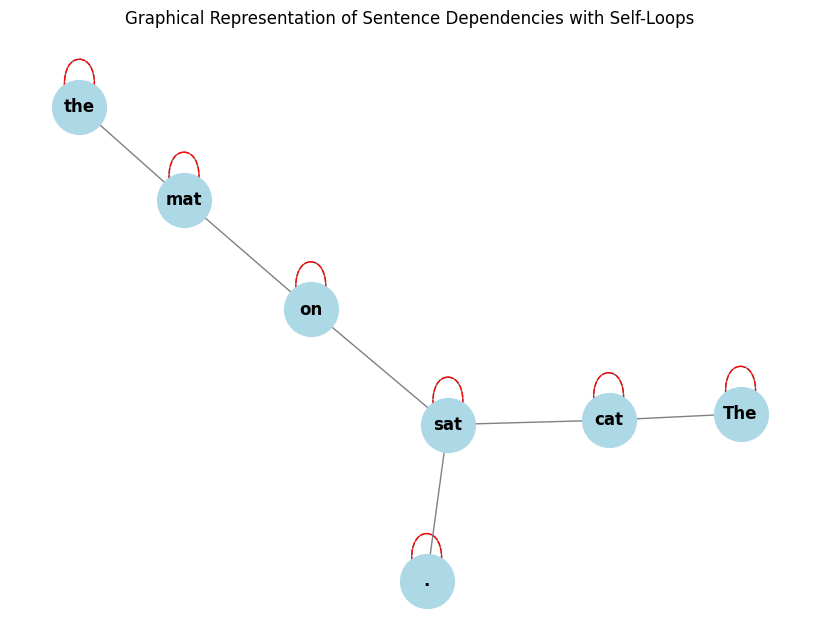

In [8]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Given tokens and adjacency matrix
tokens = ['The', 'cat', 'sat', 'on', 'the', 'mat', '.']
adj_matrix = np.array([
    [1, 1, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 1],
    [0, 0, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0, 0, 1]
])

# Convert adjacency matrix to NetworkX graph
G = nx.Graph()
for i, token in enumerate(tokens):
    G.add_node(i, label=token)  # Add nodes with labels (tokens)

# Add edges based on the adjacency matrix
for i in range(len(adj_matrix)):
    for j in range(i, len(adj_matrix)):  # Include self-loops by allowing i == j
        if adj_matrix[i][j] == 1:
            G.add_edge(i, j)

# Define node positions using a spring layout for visual clarity
pos = nx.spring_layout(G, seed=42)

# Draw the graph with labels and self-loops
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, labels={i: token for i, token in enumerate(tokens)},
        node_color="lightblue", node_size=1500, font_size=12, font_weight="bold", edge_color="gray")

# Highlight self-loops with a different edge style or color for better visibility
self_loop_edges = [(i, i) for i in range(len(adj_matrix)) if adj_matrix[i][i] == 1]
nx.draw_networkx_edges(G, pos, edgelist=self_loop_edges, edge_color="red", style="dashed")

plt.title("Graphical Representation of Sentence Dependencies with Self-Loops")
plt.show()


Explanation:
- Nodes represent each token in the sentence.
- Edges represent dependency relationships between tokens.
- Self-Loops are shown as red, dashed edges for visual distinction, indicating that each node is connected to itself.


### Summary and Key Takeaways

- **Adjacency Matrix**: Essential for defining node connectivity in a GCN. In NLP tasks, the matrix is derived from dependency parsing.
- **Dependency-Based Connections**: Using dependency relations for edge connections helps capture syntactic structure in sentences.
- **Self-Loops**: Enhance GCN performance by allowing each node to retain its original features, which is especially useful in deep layers.

With a fully constructed adjacency matrix, we’re now prepared to proceed to the next stage: defining feature vectors for each word, completing the data input for our GCN model. In the next section, we’ll focus on creating feature matrices that represent the syntactic and semantic properties of each node (word) in the graph.